In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
1. 시기(연도,달,요일)별 매출 비교, 3. 기상정보에 따른 메뉴 판매량(필터링기능) 확인

In [62]:
import random
import pandas as pd

# 메뉴와 가격 정보
menu_price = {
    "날으는 김밥": 3500,
    "치즈김밥": 4500,
    "참치김밥": 4500,
    "소고기김밥": 5000,
    "돈까스김밥": 5000,
    "멸추김밥": 5000,
    "계란말이김밥": 5500,
    "땡초진미김밥": 5000,
    "참치와사비김밥": 5000,
    "날치알김밥": 5000,
    "새우튀김김밥": 5000,
    "참치주먹밥": 4000,
    "소고기주먹밥": 4000,
    "멸치주먹밥": 4000,
    "날치알주먹밥": 4000,
    "된장찌개": 7000,
    "참치찌개": 7000,
    "순두부찌개": 7000,
    "김치찌개": 7000,
    "참치순두부찌개": 7500,
    "부대찌개": 8000,
    "육개장": 8000,
    "뚝배기불고기": 8000,
    "공기밥": 1000,
    "떡볶이": 4500,
    "라볶이": 5000,
    "치즈떡볶이": 5500,
    "치즈라볶이": 6000,
    "오뎅": 4500,
    "쫄면": 7000,
    "우동": 6000,
    "얼큰해물우동": 8500,
    "비빔국수": 7000,
    "잔치국수": 7000,
    "라면": 4500,
    "떡라면": 5500,
    "김치라면": 5500,
    "만두라면": 5500,
    "치즈라면": 5500,
    "얼큰해물라면": 8500,
    "떡국": 7000,
    "만두국": 7000,
    "떡만두국": 8000,
    "군만두": 4000,
    "고기만두": 4000,
    "김치만두": 4000,
    "오징어덮밥": 8000,
    "제육덮밥": 7000,
    "참치덮밥": 7500,
    "오불덮밥": 8000,
    "비빔밥": 7000,
    "참치비빔밥": 7500,
    "새우볶음밥": 7000,
    "김치볶음밥": 7000,
    "오므라이스": 7000,
    "돈까스": 9500,
    "치즈돈까스": 9500,
    "고구마돈까스": 9500,
    "생선까스": 9500,
    "콩국수": 8000,
    "날으는정식 세트": 18000,
    "비빔밥정식세트": 18000
}

# 샘플 데이터 구성 요소
genders = ["남", "여"]
ages = range(0, 100)
time_slots = ["아침(7~12)", "오후(12~17)", "저녁(17~22)"]
months = range(1, 13)  # 1월부터 12월까지 고려
days_of_week = ["월", "화", "수", "목", "금", "토", "일"]

# 샘플 데이터 생성
data = []
for _ in range(300):
    # 인원 정보
    num_people = random.randint(1, 5)
    people = ", ".join([f"{random.choice(genders)}({random.choice(ages)})" for _ in range(num_people)])
    
    # 시간대 정보
    year = 2024
    month = random.choice(months)
    time_slot = random.choice(time_slots)
    holiday = random.choice(["공휴일O", "공휴일X"])
    day_of_week = random.choice(days_of_week)
    
    # 날씨 정보
    if month in [12, 1]:  # 12월과 1월일 경우 눈이 가능
        weather = random.choice(["맑음", "흐림", "비", "눈"])
    else:
        weather = random.choice(["맑음", "흐림", "비"])
    
    # 메뉴 및 매출
    menu_count = random.randint(1, 3)
    selected_menu = random.sample(list(menu_price.keys()), menu_count)
    menu = ", ".join(selected_menu)
    sales = sum(menu_price[item] for item in selected_menu)  # 매출 합계

    # 행 데이터 추가
    data.append({
        "인원": people,
        "시간대": f"{year}년 {month}월 {day_of_week}요일 {holiday} {time_slot} {weather}",
        "메뉴": menu,
        "매출": sales
    })

# DataFrame 생성
df_2024 = pd.DataFrame(data)

     월 요일      매출
0    1  금   30000
1    1  수   44000
2    1  월   48000
3    1  일   54500
4    1  토   79000
..  .. ..     ...
77  12  수   46000
78  12  월   50500
79  12  일   36500
80  12  토   14000
81  12  화  111000

[82 rows x 3 columns]


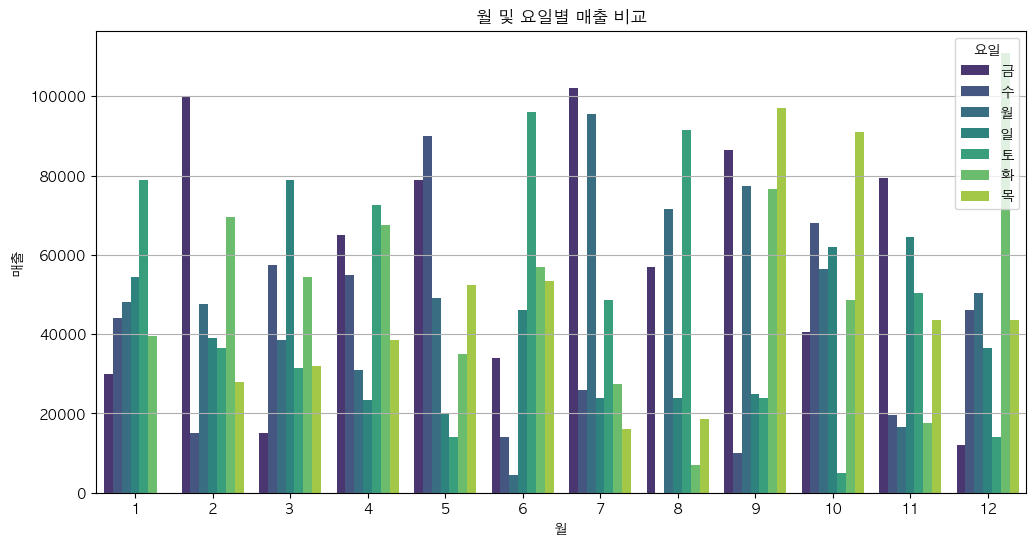

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 기존 코드에서 만든 DataFrame df_2024를 사용

# '시간대'에서 월과 요일 추출
df_2024['월'] = df_2024['시간대'].str.extract(r'(\d+)년 (\d+)월')[1].astype(int)
df_2024['요일'] = df_2024['시간대'].str.extract(r'(\w+)요일')[0]

# 달과 요일별 매출 합계 계산
monthly_weekday_sales = df_2024.groupby(['월', '요일'])['매출'].sum().reset_index()

# 데이터 확인
print(monthly_weekday_sales)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_weekday_sales, x='월', y='매출', hue='요일', palette='viridis')
plt.title('월 및 요일별 매출 비교')
plt.xlabel('월')
plt.ylabel('매출')
plt.legend(title='요일')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


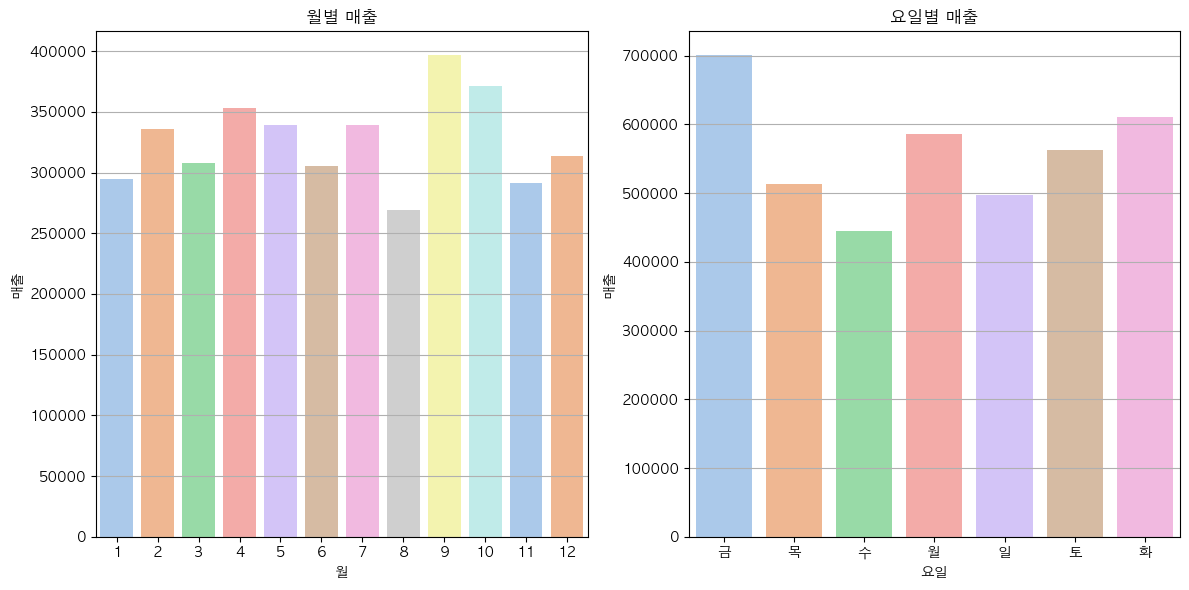

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 월별 매출 집계
monthly_sales = df_2024.groupby('월')['매출'].sum().reset_index()

# 요일별 매출 집계
weekday_sales = df_2024.groupby('요일')['매출'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 6))

# 월별 매출 시각화
plt.subplot(1, 2, 1)
sns.barplot(data=monthly_sales, x='월', y='매출', palette='pastel')
plt.title('월별 매출')
plt.xlabel('월')
plt.ylabel('매출')
plt.xticks(rotation=0)
plt.grid(axis='y')

# 요일별 매출 시각화
plt.subplot(1, 2, 2)
sns.barplot(data=weekday_sales, x='요일', y='매출', palette='pastel')
plt.title('요일별 매출')
plt.xlabel('요일')
plt.ylabel('매출')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


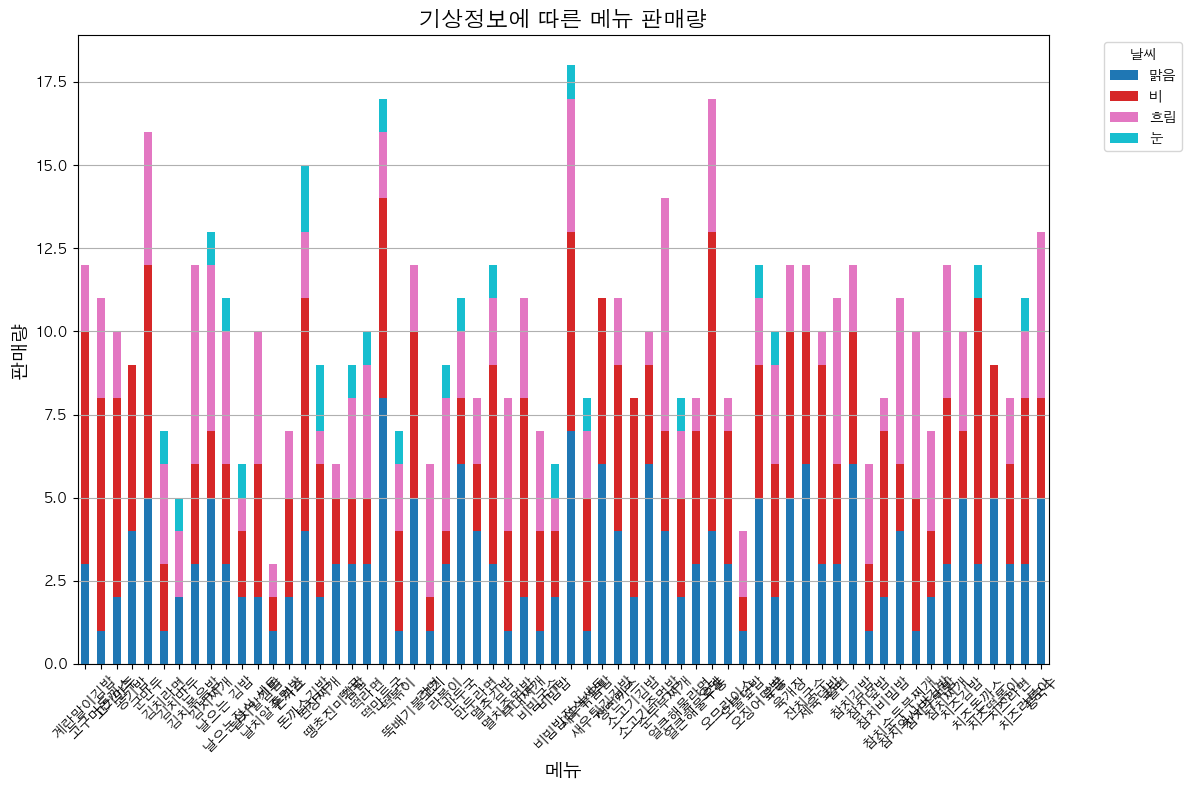

In [29]:
# 기상 조건 리스트
weather_conditions = df_2024['시간대'].str.extract(r'(\S+)$')[0].unique()  # '시간대' 열에서 기상 정보 추출

# 판매량 집계
menu_sales_by_weather = {}
for weather in weather_conditions:
    # 해당 날씨에 맞는 데이터 필터링
    filtered_data = df_2024[df_2024['시간대'].str.contains(weather)]
    
    # 메뉴별 판매량 집계
    menu_sales = filtered_data['메뉴'].str.split(', ').explode().value_counts()
    menu_sales_by_weather[weather] = menu_sales

# 결과를 DataFrame으로 변환
menu_sales_df = pd.DataFrame(menu_sales_by_weather).fillna(0).astype(int)

# 시각화
plt.figure(figsize=(12, 8))

# 메뉴별 판매량 시각화
menu_sales_df.plot(kind='bar', stacked=True, colormap='tab10', ax=plt.gca())
plt.title('기상정보에 따른 메뉴 판매량', fontsize=16)
plt.xlabel('메뉴', fontsize=14)
plt.ylabel('판매량', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='날씨', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

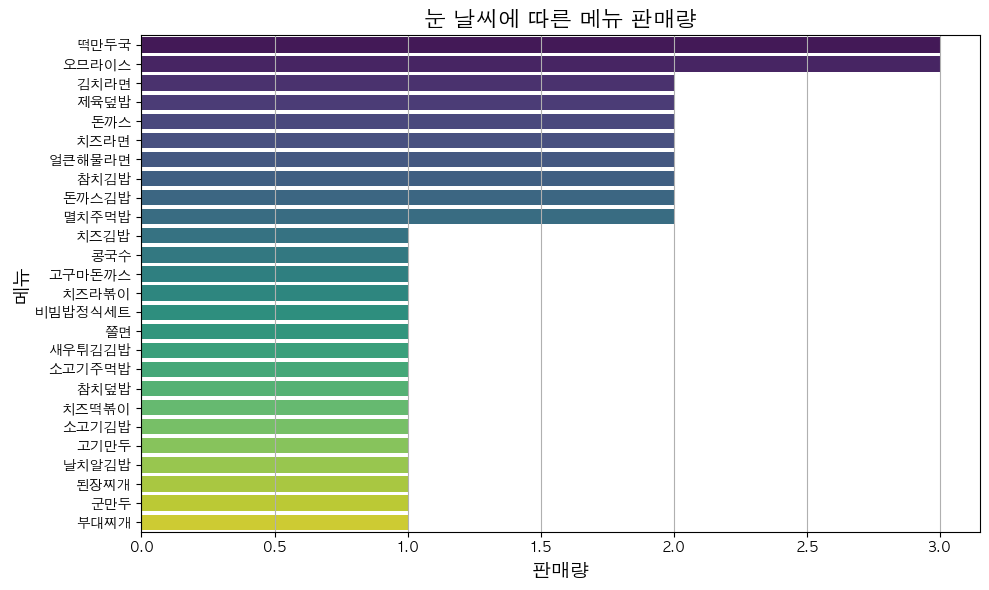

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 눈인 경우만 필터링
snowy_days = df_2024[df_2024['시간대'].str.contains('눈')]

# 판매량 집계
menu_sales_by_weather = snowy_days['메뉴'].str.split(', ').explode().value_counts()

# 결과를 DataFrame으로 변환
menu_sales_df = menu_sales_by_weather.reset_index()
menu_sales_df.columns = ['메뉴', '판매량']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=menu_sales_df, x='판매량', y='메뉴', palette='viridis')
plt.title('눈 날씨에 따른 메뉴 판매량', fontsize=16)
plt.xlabel('판매량', fontsize=14)
plt.ylabel('메뉴', fontsize=14)
plt.grid(axis='x')

plt.tight_layout()
plt.show()


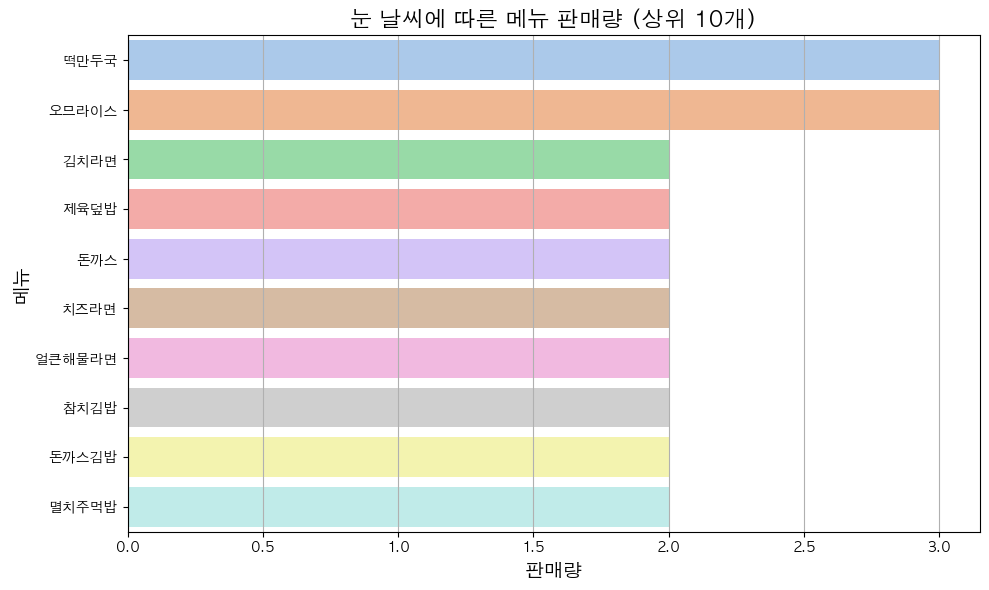

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 눈인 경우만 필터링
snowy_days = df_2024[df_2024['시간대'].str.contains('눈')]

# 판매량 집계
menu_sales_by_weather = snowy_days['메뉴'].str.split(', ').explode().value_counts()

# 결과를 DataFrame으로 변환
menu_sales_df = menu_sales_by_weather.reset_index()
menu_sales_df.columns = ['메뉴', '판매량']

# 상위 10개 메뉴 선택
top_10_menu_sales = menu_sales_df.head(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_menu_sales, x='판매량', y='메뉴', palette='pastel')
plt.title('눈 날씨에 따른 메뉴 판매량 (상위 10개)', fontsize=16)
plt.xlabel('판매량', fontsize=14)
plt.ylabel('메뉴', fontsize=14)
plt.grid(axis='x')

plt.tight_layout()
plt.show()


2. 메뉴별 성별, 연령 판매 분포

In [21]:
import random
import pandas as pd

# 메뉴와 가격 정보
menu_price = {
    "날으는 김밥": 3500,
    "치즈김밥": 4500,
    "참치김밥": 4500,
    "소고기김밥": 5000,
    "돈까스김밥": 5000,
    "멸추김밥": 5000,
    "계란말이김밥": 5500,
    "땡초진미김밥": 5000,
    "참치와사비김밥": 5000,
    "날치알김밥": 5000,
    "새우튀김김밥": 5000,
    "참치주먹밥": 4000,
    "소고기주먹밥": 4000,
    "멸치주먹밥": 4000,
    "날치알주먹밥": 4000,
    "된장찌개": 7000,
    "참치찌개": 7000,
    "순두부찌개": 7000,
    "김치찌개": 7000,
    "참치순두부찌개": 7500,
    "부대찌개": 8000,
    "육개장": 8000,
    "뚝배기불고기": 8000,
    "공기밥": 1000,
    "떡볶이": 4500,
    "라볶이": 5000,
    "치즈떡볶이": 5500,
    "치즈라볶이": 6000,
    "오뎅": 4500,
    "쫄면": 7000,
    "우동": 6000,
    "얼큰해물우동": 8500,
    "비빔국수": 7000,
    "잔치국수": 7000,
    "라면": 4500,
    "떡라면": 5500,
    "김치라면": 5500,
    "만두라면": 5500,
    "치즈라면": 5500,
    "얼큰해물라면": 8500,
    "떡국": 7000,
    "만두국": 7000,
    "떡만두국": 8000,
    "군만두": 4000,
    "고기만두": 4000,
    "김치만두": 4000,
    "오징어덮밥": 8000,
    "제육덮밥": 7000,
    "참치덮밥": 7500,
    "오불덮밥": 8000,
    "비빔밥": 7000,
    "참치비빔밥": 7500,
    "새우볶음밥": 7000,
    "김치볶음밥": 7000,
    "오므라이스": 7000,
    "돈까스": 9500,
    "치즈돈까스": 9500,
    "고구마돈까스": 9500,
    "생선까스": 9500,
    "콩국수": 8000,
    "날으는정식 세트": 18000,
    "비빔밥정식세트": 18000
}

# 샘플 데이터 구성 요소
genders = ["남", "여"]
ages = range(0, 100)
time_slots = ["아침(7~12)", "오후(12~17)", "저녁(17~22)"]
months = [11]  # 11월만 고려
days_of_week = ["월", "화", "수", "목", "금", "토", "일"]
weathers = ["맑음", "흐림", "비"]#, "눈"]

# 샘플 데이터 생성
data = []
for _ in range(100):
    # 인원 정보
    num_people = random.randint(1, 5)
    people = ", ".join([f"{random.choice(genders)}({random.choice(ages)})" for _ in range(num_people)])
    
    # 시간대 정보
    year = 2024
    month = random.choice(months)
    time_slot = random.choice(time_slots)
    holiday = random.choice(["공휴일O", "공휴일X"])
    day_of_week = random.choice(days_of_week)
    weather = random.choice(weathers)
    
    # 메뉴 및 매출
    menu_count = random.randint(1, 3)
    selected_menu = random.sample(list(menu_price.keys()), menu_count)
    menu = ", ".join(selected_menu)
    sales = sum(menu_price[item] for item in selected_menu)  # 매출 합계

    # 행 데이터 추가
    data.append({
        "인원": people,
        "시간대": f"{year}년 {month}월 {day_of_week}요일 {holiday} {time_slot} {weather}",
        "메뉴": menu,
        "매출": sales
    })

# DataFrame 생성
df_2024 = pd.DataFrame(data)


In [22]:
df_2024.head()

,인원,시간대,메뉴,매출
0,"여(20), 남(58)",2024년 11월 화요일 공휴일O 오후(12~17) 흐림,김치라면,5500
1,"남(81), 여(87), 남(91), 남(43)",2024년 11월 화요일 공휴일X 저녁(17~22) 흐림,"떡만두국, 군만두",12000
2,"남(44), 남(11), 여(82), 여(60)",2024년 11월 수요일 공휴일X 오후(12~17) 비,"치즈돈까스, 만두라면",15000
3,여(22),2024년 11월 수요일 공휴일X 저녁(17~22) 흐림,치즈돈까스,9500
4,"남(75), 여(72), 남(10), 남(26), 남(78)",2024년 11월 수요일 공휴일O 오후(12~17) 비,"부대찌개, 떡만두국",16000


/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/1252618747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/1252618747.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])


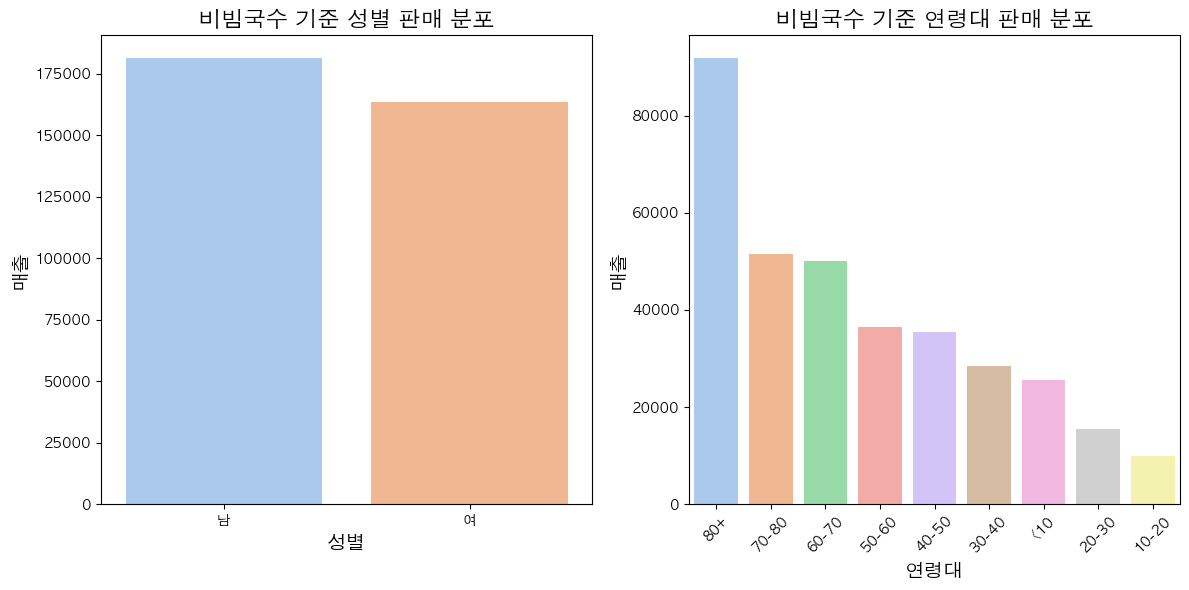

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
############2024-11월 기준 비빔국수 성별, 나이별 그래프


# 떡볶이 메뉴 기준으로 데이터 필터링
tteokbokki_data = df_2024[df_2024['메뉴'].str.contains("떡볶이")]

# 성별 및 연령대 데이터 분리
tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])
tteokbokki_data = tteokbokki_data.explode(['성별', '연령대'])

# 연령대 데이터 타입을 정수형으로 변환
tteokbokki_data['연령대'] = tteokbokki_data['연령대'].astype(int)

# 연령대 구간 정의 및 변환
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
tteokbokki_data['연령대'] = pd.cut(tteokbokki_data['연령대'], bins=bins, labels=labels)

# 성별 및 연령대에 따른 매출 집계
sales_by_gender = tteokbokki_data.groupby('성별')['매출'].sum().reset_index()
sales_by_age = tteokbokki_data.groupby('연령대')['매출'].sum().reset_index()

# 연령대 매출을 기준으로 내림차순 정렬
sales_by_age = sales_by_age.sort_values('매출', ascending=False)

# 연령대 순서 재지정
age_order = sales_by_age['연령대'].tolist()
tteokbokki_data['연령대'] = pd.Categorical(tteokbokki_data['연령대'], categories=age_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 6))

# 성별 매출 시각화
plt.subplot(1, 2, 1)
sns.barplot(data=sales_by_gender, x='성별', y='매출', palette='pastel')
plt.title('비빔국수 기준 성별 판매 분포', fontsize=16)
plt.xlabel('성별', fontsize=14)
plt.ylabel('매출', fontsize=14)

# 연령대 매출 시각화
plt.subplot(1, 2, 2)
sns.barplot(data=sales_by_age, x='연령대', y='매출', palette='pastel', order=age_order)
plt.title('비빔국수 기준 연령대 판매 분포', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('매출', fontsize=14)

plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/3230152306.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/3230152306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])


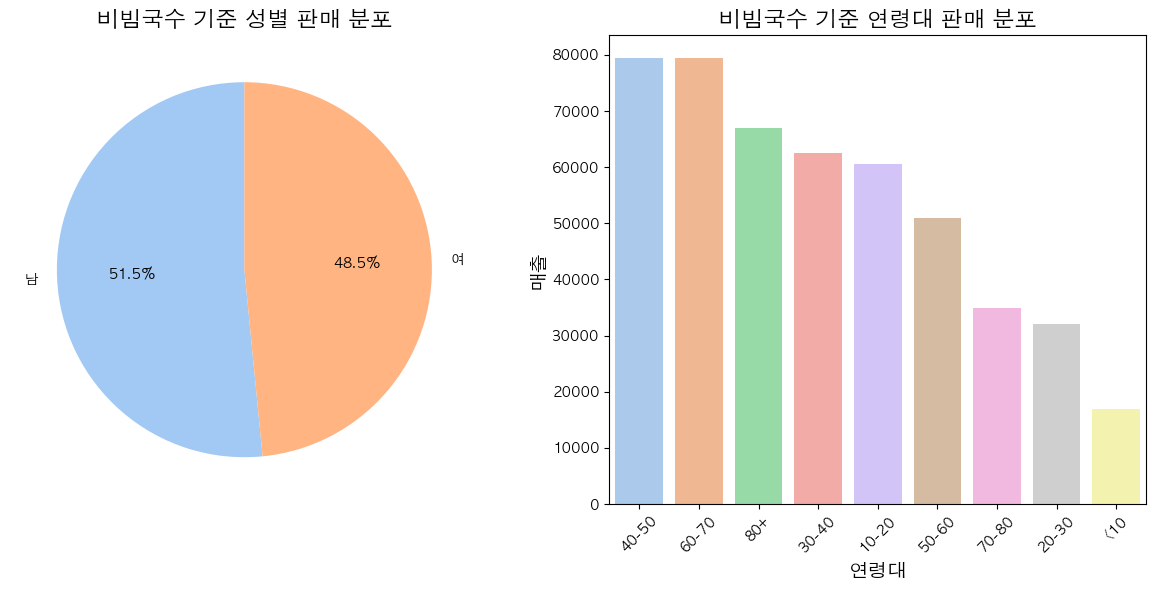

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 떡볶이 메뉴 기준으로 데이터 필터링
tteokbokki_data = df_2024[df_2024['메뉴'].str.contains("떡볶이")]

# 성별 및 연령대 데이터 분리
tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])
tteokbokki_data = tteokbokki_data.explode(['성별', '연령대'])

# 연령대 데이터 타입을 정수형으로 변환
tteokbokki_data['연령대'] = tteokbokki_data['연령대'].astype(int)

# 연령대 구간 정의 및 변환
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
tteokbokki_data['연령대'] = pd.cut(tteokbokki_data['연령대'], bins=bins, labels=labels)

# 성별 및 연령대에 따른 매출 집계
sales_by_gender = tteokbokki_data.groupby('성별')['매출'].sum().reset_index()
sales_by_age = tteokbokki_data.groupby('연령대')['매출'].sum().reset_index()

# 연령대 매출을 기준으로 내림차순 정렬
sales_by_age = sales_by_age.sort_values('매출', ascending=False)

# 연령대 순서 재지정
age_order = sales_by_age['연령대'].tolist()
tteokbokki_data['연령대'] = pd.Categorical(tteokbokki_data['연령대'], categories=age_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 6))

# 성별 매출 시각화 (원형 그래프)
plt.subplot(1, 2, 1)
plt.pie(sales_by_gender['매출'], labels=sales_by_gender['성별'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('비빔국수 기준 성별 판매 분포', fontsize=16)

# 연령대 매출 시각화
plt.subplot(1, 2, 2)
sns.barplot(data=sales_by_age, x='연령대', y='매출', palette='pastel', order=age_order)
plt.title('비빔국수 기준 연령대 판매 분포', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('매출', fontsize=14)

plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/1039019139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/1039019139.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])


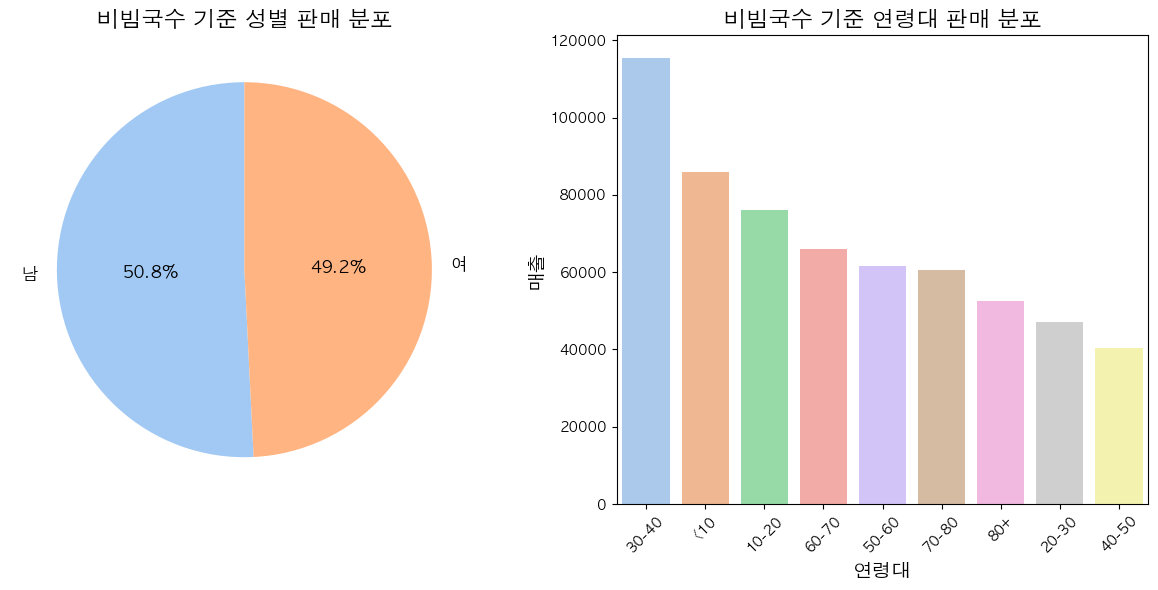

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 떡볶이 메뉴 기준으로 데이터 필터링
tteokbokki_data = df_2024[df_2024['메뉴'].str.contains("떡볶이")]

# 성별 및 연령대 데이터 분리
tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])
tteokbokki_data = tteokbokki_data.explode(['성별', '연령대'])

# 연령대 데이터 타입을 정수형으로 변환
tteokbokki_data['연령대'] = tteokbokki_data['연령대'].astype(int)

# 연령대 구간 정의 및 변환
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
tteokbokki_data['연령대'] = pd.cut(tteokbokki_data['연령대'], bins=bins, labels=labels)

# 성별 및 연령대에 따른 매출 집계
sales_by_gender = tteokbokki_data.groupby('성별')['매출'].sum().reset_index()
sales_by_age = tteokbokki_data.groupby('연령대')['매출'].sum().reset_index()

# 연령대 매출을 기준으로 내림차순 정렬
sales_by_age = sales_by_age.sort_values('매출', ascending=False)

# 연령대 순서 재지정
age_order = sales_by_age['연령대'].tolist()
tteokbokki_data['연령대'] = pd.Categorical(tteokbokki_data['연령대'], categories=age_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 6))

# 성별 매출 시각화 (원형 그래프)
plt.subplot(1, 2, 1)
colors = sns.color_palette('pastel')
wedges, texts, autotexts = plt.pie(
    sales_by_gender['매출'], 
    labels=sales_by_gender['성별'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    pctdistance=0.5  # 비율 숫자를 원 안쪽으로 이동
)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color("black")
plt.title('비빔국수 기준 성별 판매 분포', fontsize=16)

# 연령대 매출 시각화
plt.subplot(1, 2, 2)
sns.barplot(data=sales_by_age, x='연령대', y='매출', palette='pastel', order=age_order)
plt.title('비빔국수 기준 연령대 판매 분포', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('매출', fontsize=14)

plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/4124547319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
/var/folders/39/0p97y4ys6dj34725yrxgtcw40000gn/T/ipykernel_49565/4124547319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])


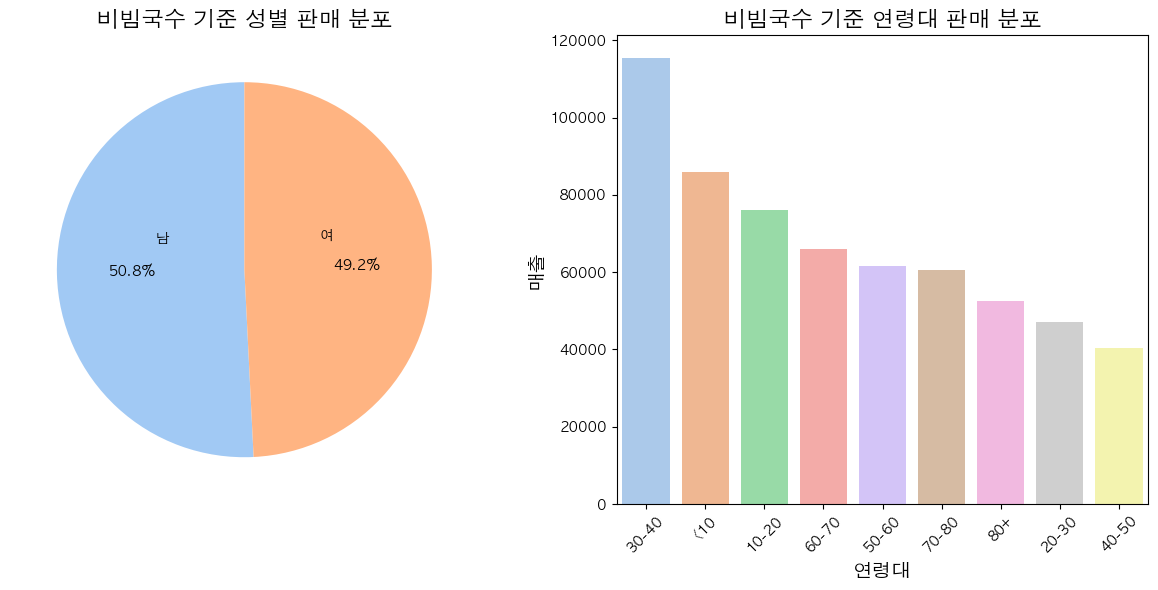

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 떡볶이 메뉴 기준으로 데이터 필터링
tteokbokki_data = df_2024[df_2024['메뉴'].str.contains("떡볶이")]

# 성별 및 연령대 데이터 분리
tteokbokki_data.loc[:, '성별'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[0] for person in x.split(', ')])
tteokbokki_data.loc[:, '연령대'] = tteokbokki_data['인원'].apply(lambda x: [person.split('(')[1][:-1] for person in x.split(', ')])
tteokbokki_data = tteokbokki_data.explode(['성별', '연령대'])

# 연령대 데이터 타입을 정수형으로 변환
tteokbokki_data['연령대'] = tteokbokki_data['연령대'].astype(int)

# 연령대 구간 정의 및 변환
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
tteokbokki_data['연령대'] = pd.cut(tteokbokki_data['연령대'], bins=bins, labels=labels)

# 성별 및 연령대에 따른 매출 집계
sales_by_gender = tteokbokki_data.groupby('성별')['매출'].sum().reset_index()
sales_by_age = tteokbokki_data.groupby('연령대')['매출'].sum().reset_index()

# 연령대 매출을 기준으로 내림차순 정렬
sales_by_age = sales_by_age.sort_values('매출', ascending=False)

# 연령대 순서 재지정
age_order = sales_by_age['연령대'].tolist()
tteokbokki_data['연령대'] = pd.Categorical(tteokbokki_data['연령대'], categories=age_order, ordered=True)

# 시각화
plt.figure(figsize=(12, 6))

# 성별 매출 시각화 (원형 그래프)
plt.subplot(1, 2, 1)
plt.pie(
    sales_by_gender['매출'], 
    labels=[f"{gender}\n\n\n\n" for gender in sales_by_gender['성별']],  # 성별에 줄 바꿈 추가
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('pastel'),
    labeldistance=0.4,  # 성별 레이블을 원 안쪽으로
    pctdistance=0.6     # 비율도 원 안쪽에 더 가깝게 위치
)
plt.title('비빔국수 기준 성별 판매 분포', fontsize=16)

# 연령대 매출 시각화
plt.subplot(1, 2, 2)
sns.barplot(data=sales_by_age, x='연령대', y='매출', palette='pastel', order=age_order)
plt.title('비빔국수 기준 연령대 판매 분포', fontsize=16)
plt.xlabel('연령대', fontsize=14)
plt.ylabel('매출', fontsize=14)

plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


1. 시기(연도,달,요일)별 매출 비교 = 작년과 올해

In [44]:
import random
import pandas as pd

# 메뉴와 가격 정보
menu_price = {
    "날으는 김밥": 3500,
    "치즈김밥": 4500,
    "참치김밥": 4500,
    "소고기김밥": 5000,
    "돈까스김밥": 5000,
    "멸추김밥": 5000,
    "계란말이김밥": 5500,
    "땡초진미김밥": 5000,
    "참치와사비김밥": 5000,
    "날치알김밥": 5000,
    "새우튀김김밥": 5000,
    "참치주먹밥": 4000,
    "소고기주먹밥": 4000,
    "멸치주먹밥": 4000,
    "날치알주먹밥": 4000,
    "된장찌개": 7000,
    "참치찌개": 7000,
    "순두부찌개": 7000,
    "김치찌개": 7000,
    "참치순두부찌개": 7500,
    "부대찌개": 8000,
    "육개장": 8000,
    "뚝배기불고기": 8000,
    "공기밥": 1000,
    "떡볶이": 4500,
    "라볶이": 5000,
    "치즈떡볶이": 5500,
    "치즈라볶이": 6000,
    "오뎅": 4500,
    "쫄면": 7000,
    "우동": 6000,
    "얼큰해물우동": 8500,
    "비빔국수": 7000,
    "잔치국수": 7000,
    "라면": 4500,
    "떡라면": 5500,
    "김치라면": 5500,
    "만두라면": 5500,
    "치즈라면": 5500,
    "얼큰해물라면": 8500,
    "떡국": 7000,
    "만두국": 7000,
    "떡만두국": 8000,
    "군만두": 4000,
    "고기만두": 4000,
    "김치만두": 4000,
    "오징어덮밥": 8000,
    "제육덮밥": 7000,
    "참치덮밥": 7500,
    "오불덮밥": 8000,
    "비빔밥": 7000,
    "참치비빔밥": 7500,
    "새우볶음밥": 7000,
    "김치볶음밥": 7000,
    "오므라이스": 7000,
    "돈까스": 9500,
    "치즈돈까스": 9500,
    "고구마돈까스": 9500,
    "생선까스": 9500,
    "콩국수": 8000,
    "날으는정식 세트": 18000,
    "비빔밥정식세트": 18000
}

# 샘플 데이터 구성 요소
genders = ["남", "여"]
ages = range(0, 100)
time_slots = ["아침(7~12)", "오후(12~17)", "저녁(17~22)"]
months = range(1, 12) 
days_of_week = ["월", "화", "수", "목", "금", "토", "일"]
weathers = ["맑음", "흐림", "비"]#, "눈"]

# 샘플 데이터 생성
data = []
for _ in range(300):
    # 인원 정보
    num_people = random.randint(1, 5)
    people = ", ".join([f"{random.choice(genders)}({random.choice(ages)})" for _ in range(num_people)])
    
    # 시간대 정보
    year = 2024
    month = random.choice(months)
    time_slot = random.choice(time_slots)
    holiday = random.choice(["공휴일O", "공휴일X"])
    day_of_week = random.choice(days_of_week)
    weather = random.choice(weathers)
    
    # 메뉴 및 매출
    menu_count = random.randint(1, 3)
    selected_menu = random.sample(list(menu_price.keys()), menu_count)
    menu = ", ".join(selected_menu)
    sales = sum(menu_price[item] for item in selected_menu)  # 매출 합계

    # 행 데이터 추가
    data.append({
        "인원": people,
        "시간대": f"{year}년 {month}월 {day_of_week}요일 {holiday} {time_slot} {weather}",
        "메뉴": menu,
        "매출": sales
    })

# DataFrame 생성
df_2024 = pd.DataFrame(data)

In [45]:
import random
import pandas as pd

# 메뉴와 가격 정보
menu_price = {
    "날으는 김밥": 3500,
    "치즈김밥": 4500,
    "참치김밥": 4500,
    "소고기김밥": 5000,
    "돈까스김밥": 5000,
    "멸추김밥": 5000,
    "계란말이김밥": 5500,
    "땡초진미김밥": 5000,
    "참치와사비김밥": 5000,
    "날치알김밥": 5000,
    "새우튀김김밥": 5000,
    "참치주먹밥": 4000,
    "소고기주먹밥": 4000,
    "멸치주먹밥": 4000,
    "날치알주먹밥": 4000,
    "된장찌개": 7000,
    "참치찌개": 7000,
    "순두부찌개": 7000,
    "김치찌개": 7000,
    "참치순두부찌개": 7500,
    "부대찌개": 8000,
    "육개장": 8000,
    "뚝배기불고기": 8000,
    "공기밥": 1000,
    "떡볶이": 4500,
    "라볶이": 5000,
    "치즈떡볶이": 5500,
    "치즈라볶이": 6000,
    "오뎅": 4500,
    "쫄면": 7000,
    "우동": 6000,
    "얼큰해물우동": 8500,
    "비빔국수": 7000,
    "잔치국수": 7000,
    "라면": 4500,
    "떡라면": 5500,
    "김치라면": 5500,
    "만두라면": 5500,
    "치즈라면": 5500,
    "얼큰해물라면": 8500,
    "떡국": 7000,
    "만두국": 7000,
    "떡만두국": 8000,
    "군만두": 4000,
    "고기만두": 4000,
    "김치만두": 4000,
    "오징어덮밥": 8000,
    "제육덮밥": 7000,
    "참치덮밥": 7500,
    "오불덮밥": 8000,
    "비빔밥": 7000,
    "참치비빔밥": 7500,
    "새우볶음밥": 7000,
    "김치볶음밥": 7000,
    "오므라이스": 7000,
    "돈까스": 9500,
    "치즈돈까스": 9500,
    "고구마돈까스": 9500,
    "생선까스": 9500,
    "콩국수": 8000,
    "날으는정식 세트": 18000,
    "비빔밥정식세트": 18000
}

# 샘플 데이터 구성 요소
genders = ["남", "여"]
ages = range(0, 100)
time_slots = ["아침(7~12)", "오후(12~17)", "저녁(17~22)"]
months = range(1,13)  # 11월만 고려
days_of_week = ["월", "화", "수", "목", "금", "토", "일"]
weathers = ["맑음", "흐림", "비"]#, "눈"]

# 샘플 데이터 생성
data = []
for _ in range(300):
    # 인원 정보
    num_people = random.randint(1, 5)
    people = ", ".join([f"{random.choice(genders)}({random.choice(ages)})" for _ in range(num_people)])
    
    # 시간대 정보
    year = 2023
    month = random.choice(months)
    time_slot = random.choice(time_slots)
    holiday = random.choice(["공휴일O", "공휴일X"])
    day_of_week = random.choice(days_of_week)
    weather = random.choice(weathers)
    
    # 메뉴 및 매출
    menu_count = random.randint(1, 3)
    selected_menu = random.sample(list(menu_price.keys()), menu_count)
    menu = ", ".join(selected_menu)
    sales = sum(menu_price[item] for item in selected_menu)  # 매출 합계

    # 행 데이터 추가
    data.append({
        "인원": people,
        "시간대": f"{year}년 {month}월 {day_of_week}요일 {holiday} {time_slot} {weather}",
        "메뉴": menu,
        "매출": sales
    })

# DataFrame 생성
df_2023 = pd.DataFrame(data)

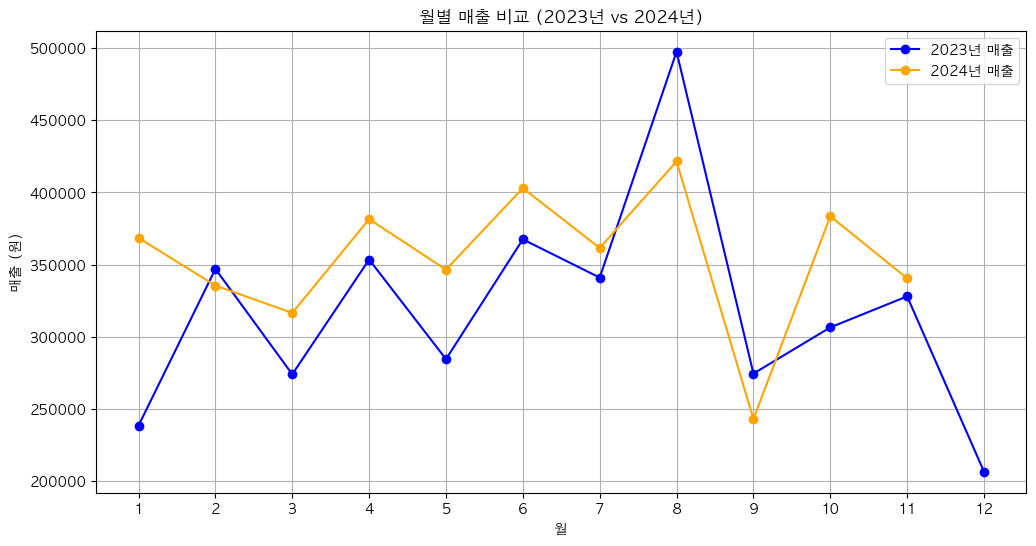

In [46]:
import matplotlib.pyplot as plt

# 2023년 월별 매출 합계 계산
df_2023['월'] = df_2023['시간대'].str.extract(r'(\d+)년 (\d+)월')[1].astype(int)  # 월 추출
monthly_sales_2023 = df_2023.groupby('월')['매출'].sum()

# 2024년 월별 매출 합계 계산
df_2024['월'] = df_2024['시간대'].str.extract(r'(\d+)년 (\d+)월')[1].astype(int)  # 월 추출
monthly_sales_2024 = df_2024.groupby('월')['매출'].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_2023.index, monthly_sales_2023.values, marker='o', label='2023년 매출', color='blue')
plt.plot(monthly_sales_2024.index, monthly_sales_2024.values, marker='o', label='2024년 매출', color='orange')

plt.title('월별 매출 비교 (2023년 vs 2024년)')
plt.xlabel('월')
plt.ylabel('매출 (원)')
plt.xticks(range(1, 13))  # 1월부터 12월까지의 눈금
plt.legend()
plt.grid()
plt.show()